import modules

In [1]:
import numpy as np
import pandas as pd
import sklearn.model_selection
import sklearn.preprocessing
import seaborn as sns
import matplotlib.pyplot

import the data

In [2]:
df = pd.read_csv("./titanic.csv")
df.head(10)
# df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Missing Values are present column Age, Cabin, and Embaked, let's check the percentage

In [4]:
missing_column = df.isna().mean().round(4) * 100
missing_column

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#Drop unnecessary column

In [6]:
df = df.drop(columns=['Ticket', 'Cabin'])
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C


In [7]:
total_embarked = df['Embarked'].describe()
total_embarked

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

Since S is most common on the Embarked column, i'll replace the remaining missing values with S.

In [8]:
df['Embarked'] = df['Embarked'].fillna('S')

In [9]:
df['Embarked'].isna().sum()

0

Let's fix the Age column

In [10]:
df[df['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,7.2292,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,7.8958,S


In [11]:
df_sex_pclass = df.groupby(by=['Sex', 'Pclass']).median(numeric_only=True)
print(df_sex_pclass)

df['Age'] = df['Age'].fillna(df.groupby(by=['Sex', 'Pclass'])['Age'].transform('median'))


               PassengerId  Survived   Age  SibSp  Parch      Fare
Sex    Pclass                                                     
female 1             447.0       1.0  35.0    0.0    0.0  82.66455
       2             439.5       1.0  28.0    0.0    0.0  22.00000
       3             376.0       0.5  21.5    0.0    0.0  12.47500
male   1             480.5       0.0  40.0    0.0    0.0  41.26250
       2             416.5       0.0  30.0    0.0    0.0  13.00000
       3             466.0       0.0  25.0    0.0    0.0   7.92500


In [12]:
df['Age'].isna().sum()

0

In [13]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


Create a Title column and delete the name column after i extracted the title column

In [14]:
print(df['Name'].str.split(', ', expand=True)[1].str.split('. ', expand=True)[0].unique())
df['Title'] = df['Name'].str.split(', ', expand=True)[1].str.split('. ', expand=True)[0]
df['Title'] = df['Title'].replace(['Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'th', 'Jonkheer'], 'Other')
df = df.drop(columns=['Name'])
df.head(5)

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'th' 'Jonkheer']


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,Mr


To get better results divide age into age groups
- Low Age 0 <= 18 -> 1
- Medium Age 18 <= 65 -> 2
- High Age 65 < -> 3

In [15]:
df.loc[df['Age'] <= 18, 'Age'] = 1
df.loc[(df['Age'] > 18) & (df['Age'] <= 65), 'Age'] = 2
df.loc[df['Age'] > 65, 'Age'] = 3
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,2.0,1,0,7.2500,S,Mr
1,2,1,1,female,2.0,1,0,71.2833,C,Mrs
2,3,1,3,female,2.0,0,0,7.9250,S,Miss
3,4,1,1,female,2.0,1,0,53.1000,S,Mrs
4,5,0,3,male,2.0,0,0,8.0500,S,Mr
5,6,0,3,male,2.0,0,0,8.4583,Q,Mr
6,7,0,1,male,2.0,0,0,51.8625,S,Mr
7,8,0,3,male,1.0,3,1,21.0750,S,Master
8,9,1,3,female,2.0,0,2,11.1333,S,Mrs
9,10,1,2,female,1.0,1,0,30.0708,C,Mrs


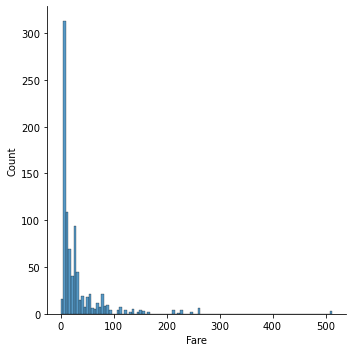

In [16]:
sns.displot(df['Fare'])

Grouping the Fares also into three groups

In [17]:
df.loc[df['Fare'] <= 10, 'Fare'] = 1
df.loc[(df['Fare'] > 10) & (df['Fare'] <= 100), 'Fare'] = 2
df.loc[df['Fare'] > 100, 'Fare'] = 3

df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,2.0,1,0,1.0,S,Mr
1,2,1,1,female,2.0,1,0,2.0,C,Mrs
2,3,1,3,female,2.0,0,0,1.0,S,Miss
3,4,1,1,female,2.0,1,0,2.0,S,Mrs
4,5,0,3,male,2.0,0,0,1.0,S,Mr
5,6,0,3,male,2.0,0,0,1.0,Q,Mr
6,7,0,1,male,2.0,0,0,2.0,S,Mr
7,8,0,3,male,1.0,3,1,2.0,S,Master
8,9,1,3,female,2.0,0,2,2.0,S,Mrs
9,10,1,2,female,1.0,1,0,2.0,C,Mrs


Get the Family Size using the sibsp and parch column
- Family size with 1 person 1
- Family Size with 2-4 persons 2
- Family Size with more than 4 people 3

In [21]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

df.loc[df['FamilySize'] <= 1, 'FamilySize'] = 1
df.loc[(df['FamilySize'] > 1) & (df['FamilySize'] <= 4), 'FamilySize'] = 2
df.loc[df['FamilySize'] > 4] = 3

df = df.drop(columns=['SibSp', 'Parch'])

df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,1,0,3,male,2.0,1.0,S,Mr,2
1,2,1,1,female,2.0,2.0,C,Mrs,2
2,3,1,3,female,2.0,1.0,S,Miss,1
3,4,1,1,female,2.0,2.0,S,Mrs,2
4,5,0,3,male,2.0,1.0,S,Mr,1
5,6,0,3,male,2.0,1.0,Q,Mr,1
6,7,0,1,male,2.0,2.0,S,Mr,1
7,3,3,3,3,3.0,3.0,3,3,3
8,9,1,3,female,2.0,2.0,S,Mrs,2
9,10,1,2,female,1.0,2.0,C,Mrs,2
